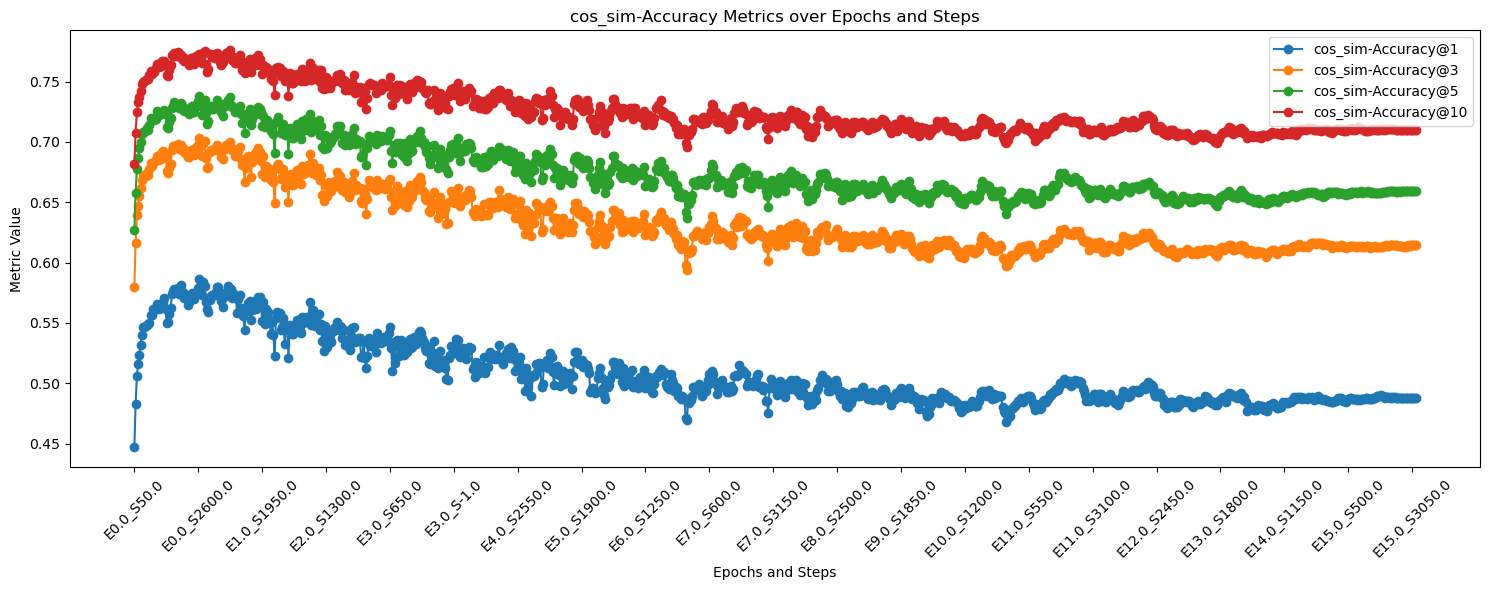

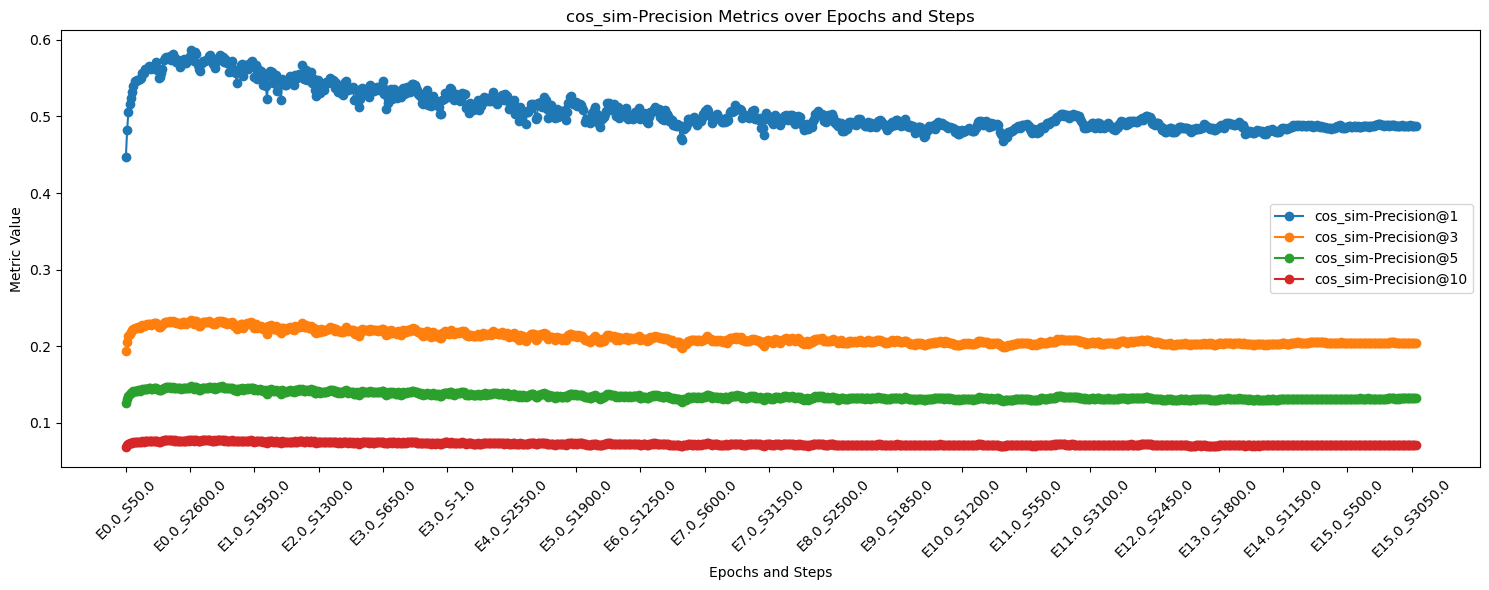

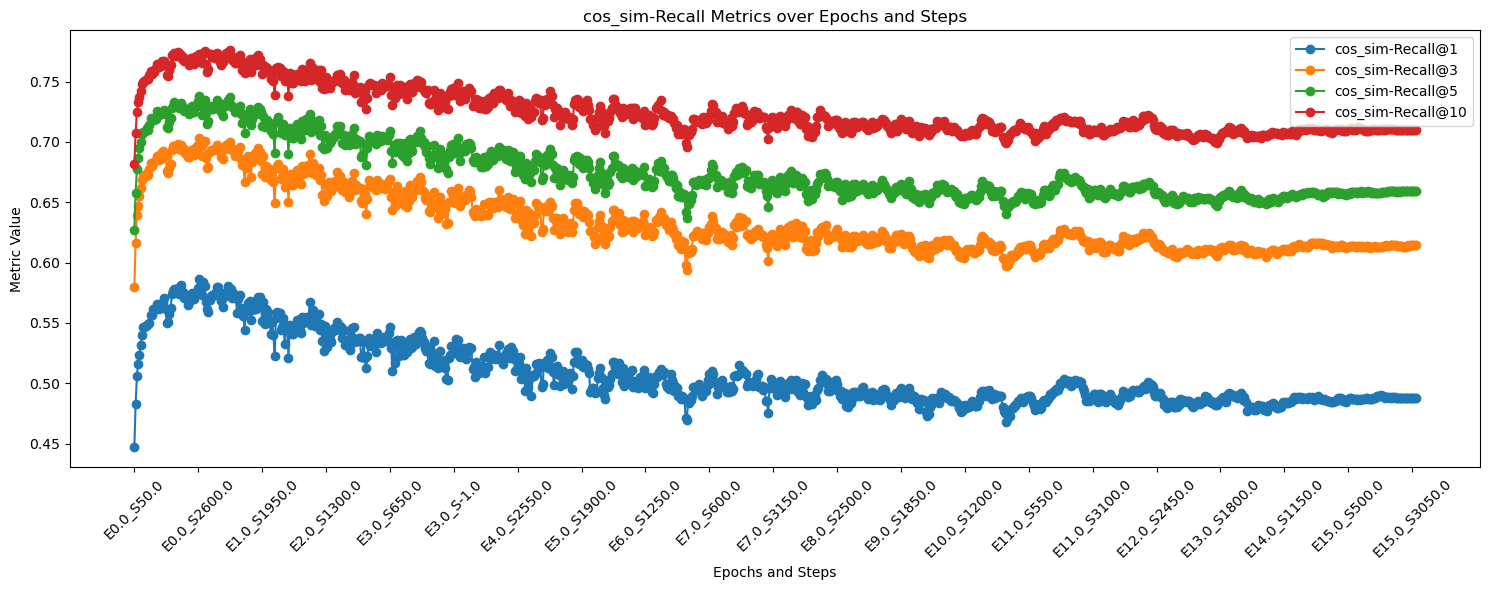

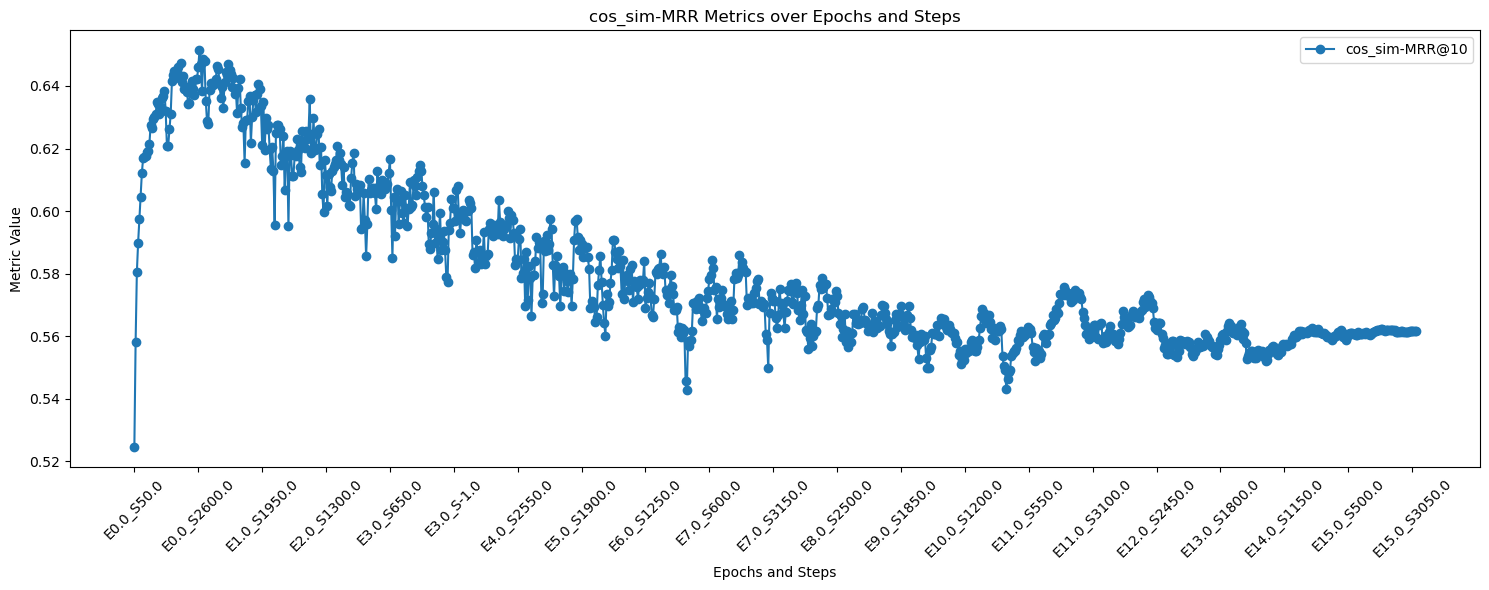

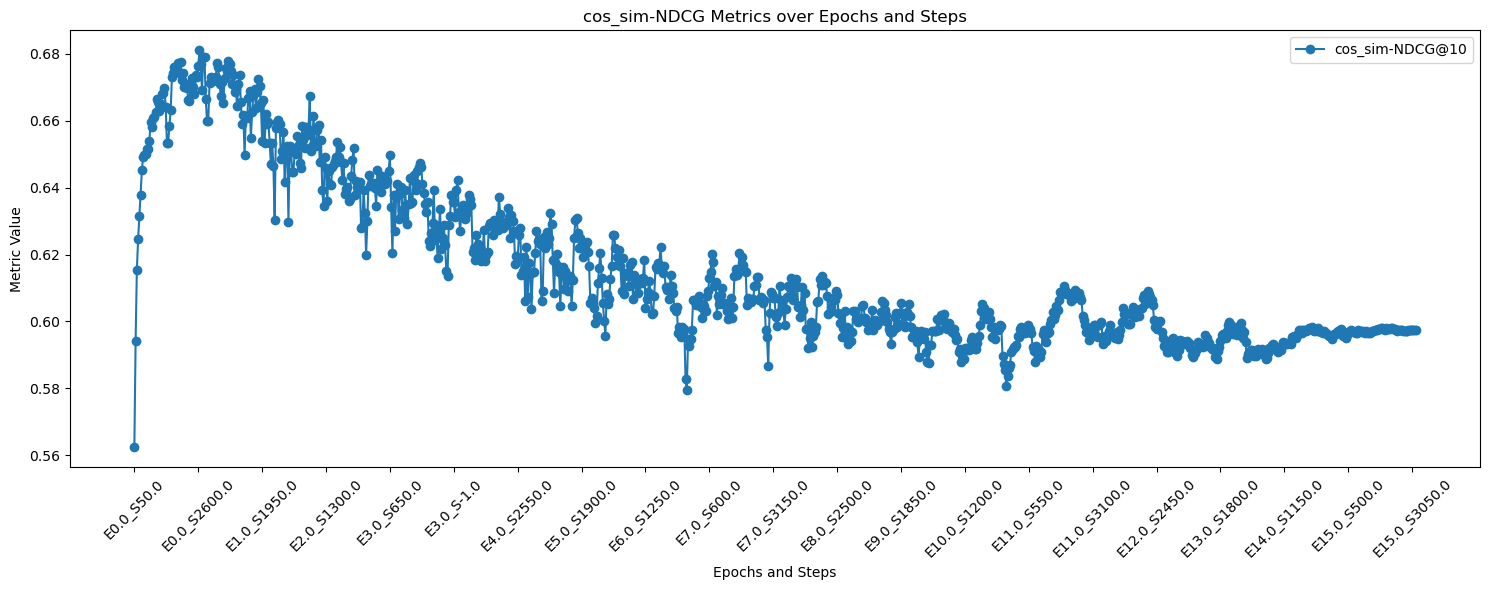

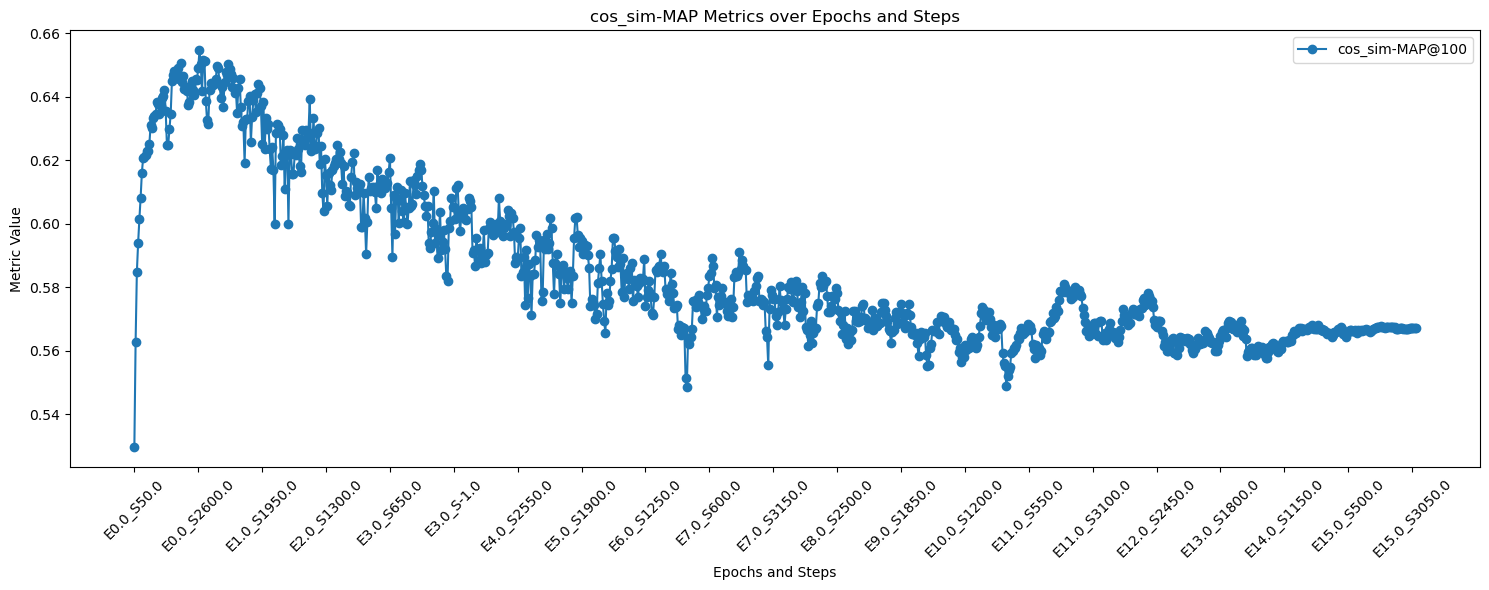

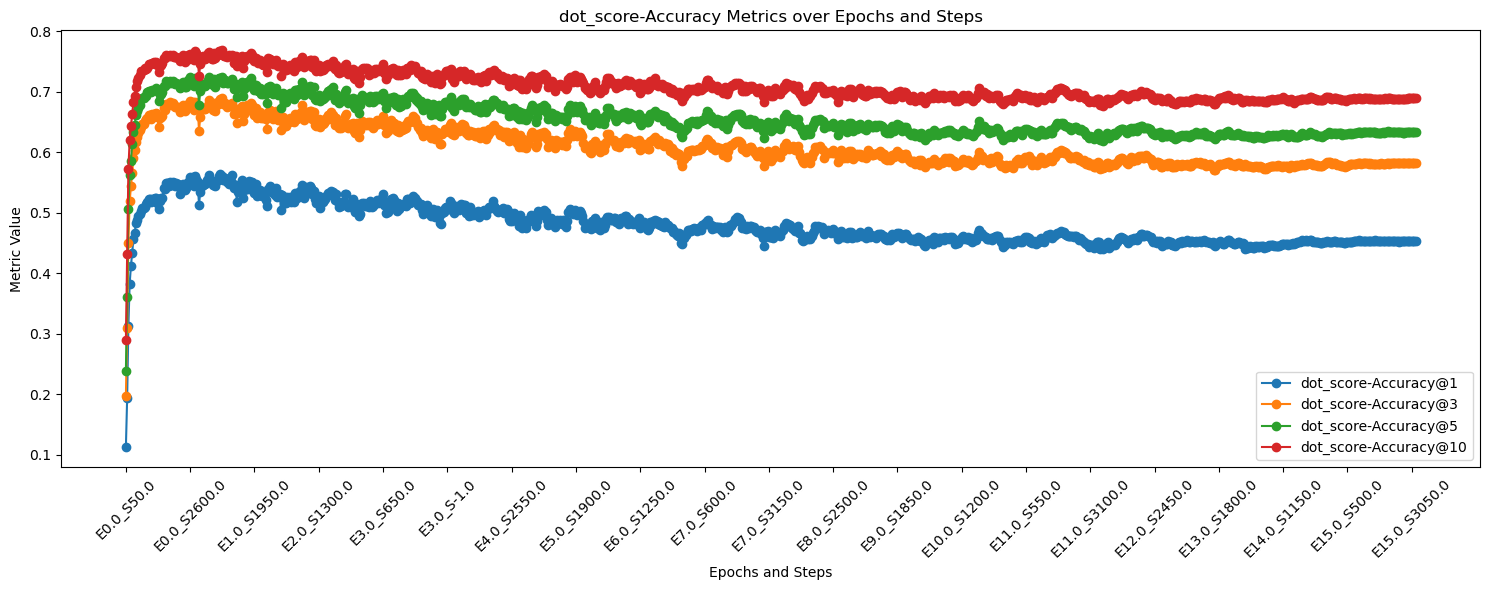

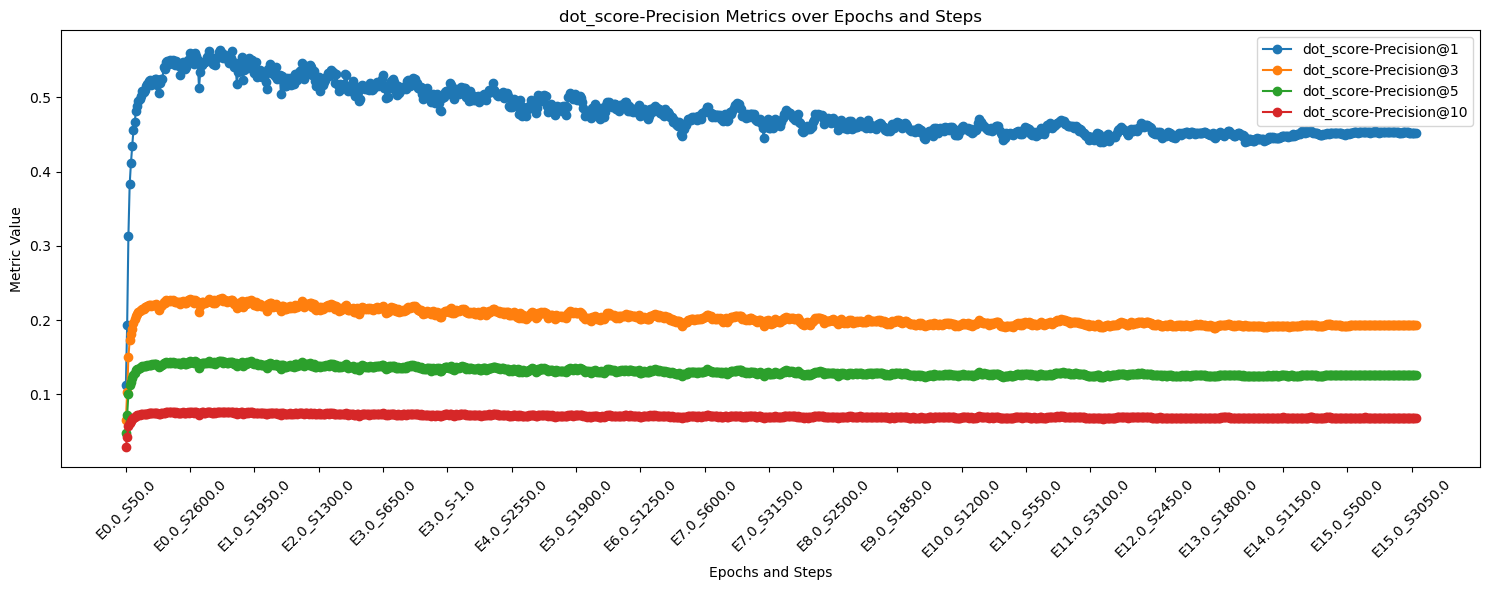

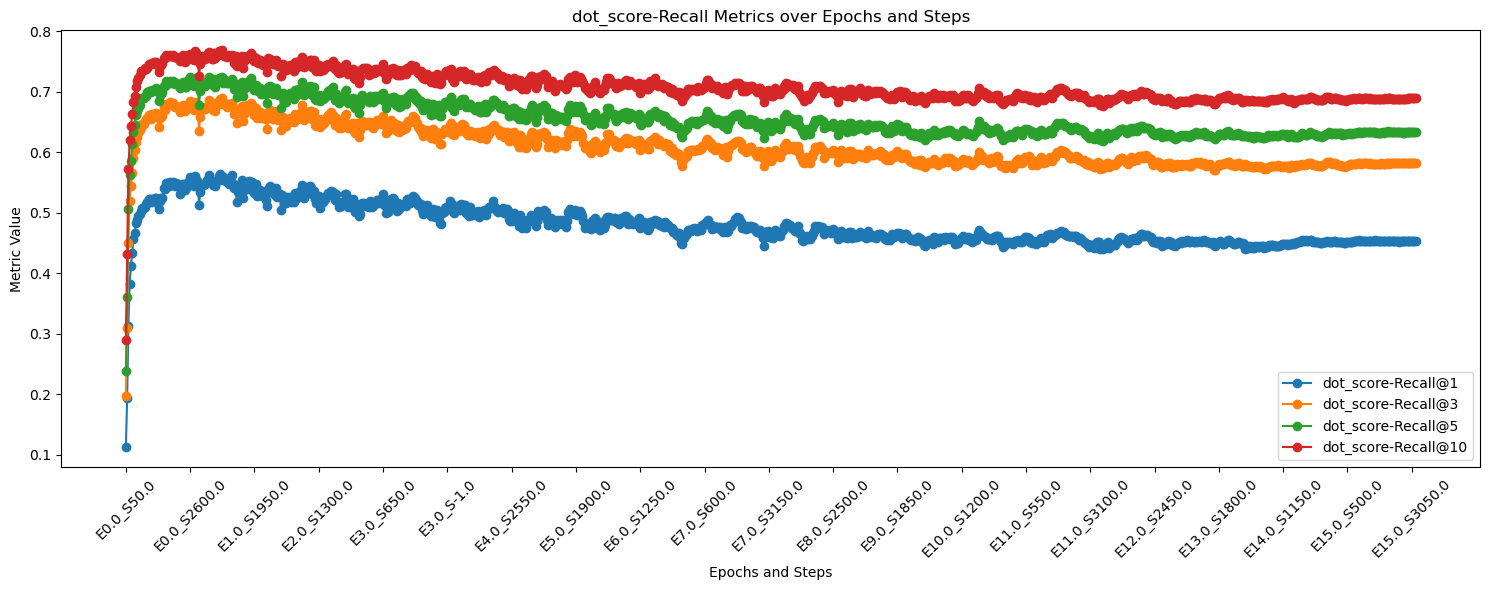

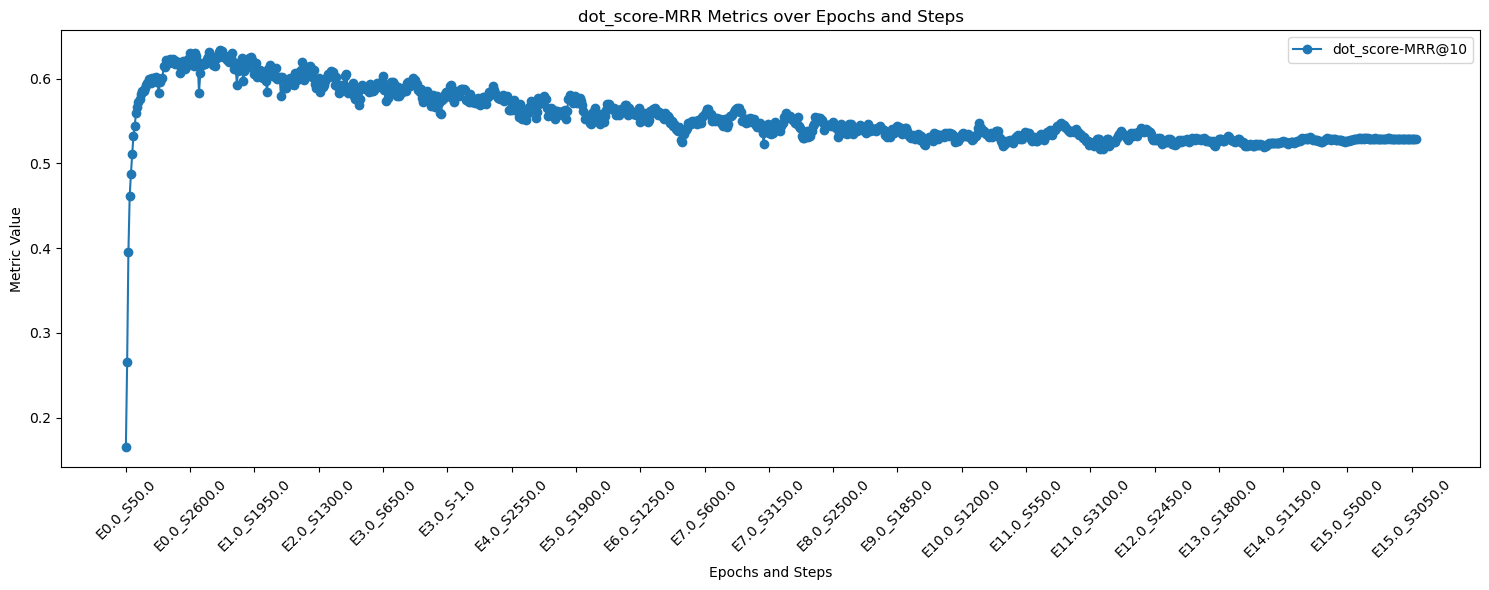

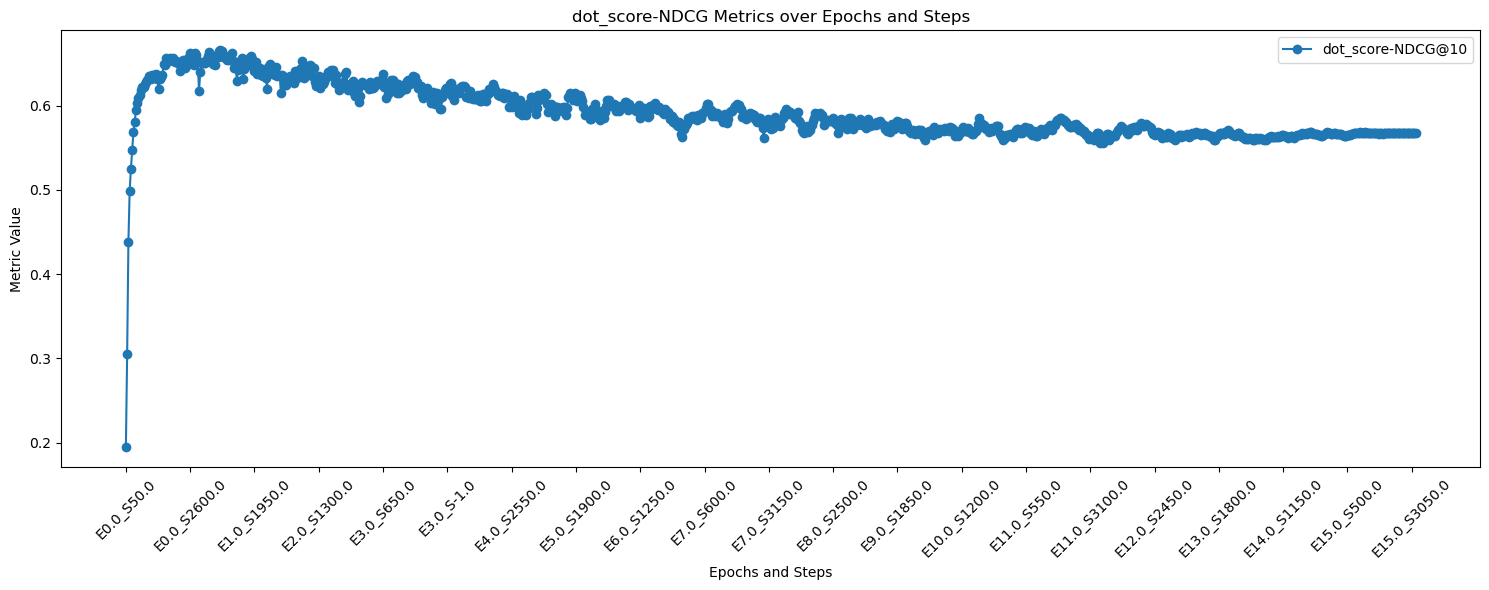

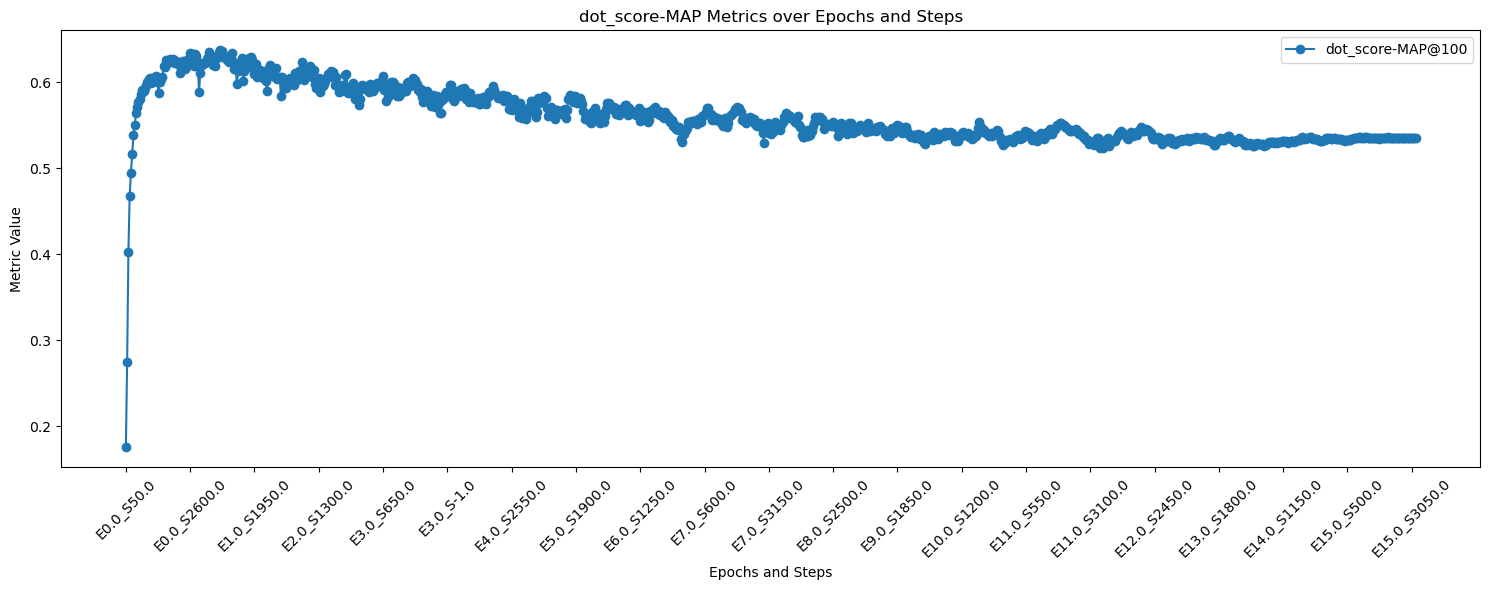

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Read the CSV file into a DataFrame
file_path = './exp_finetune/eval/Information-Retrieval_evaluation_results.csv'
df = pd.read_csv(file_path)

# Create a new column combining 'epoch' and 'steps'
df['epoch_steps'] = df.apply(lambda row: f"E{row['epoch']}_S{row['steps']}", axis=1)

# Collect metrics but exclude 'epoch', 'steps', and 'epoch_steps'
all_metrics = df.columns[2:-1]

# Group metrics based on their root name (ignoring the '@' part)
grouped_metrics = defaultdict(list)
for metric in all_metrics:
    root_metric = metric.split("@")[0]
    grouped_metrics[root_metric].append(metric)

# Generate charts for each group of metrics
for root_metric, grouped_metric_list in grouped_metrics.items():
    plt.figure(figsize=(15, 6))
    
    for metric in grouped_metric_list:
        plt.plot(df['epoch_steps'], df[metric], marker='o', label=metric)
    
    # Customize chart
    plt.xlabel('Epochs and Steps')
    plt.ylabel('Metric Value')
    plt.title(f'{root_metric} Metrics over Epochs and Steps')
    plt.legend()
    
    # Skip some x-axis labels for better visibility
    skip = len(df) // 20  # Show only around 20 labels
    plt.xticks(df.index[::skip], df['epoch_steps'].iloc[::skip], rotation=45)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [2]:
# Initialize a dictionary to store the optimal steps for each metric
optimal_steps = {}

# Find the optimal number of steps for each metric
for metric in all_metrics:
    # Find the row where the metric is maximized
    optimal_row = df[df[metric] == df[metric].max()]
    
    # Retrieve the epoch and step where the metric is maximized
    optimal_epoch = optimal_row['epoch'].values[0]
    optimal_step = optimal_row['steps'].values[0]
    
    # Save to the dictionary
    optimal_steps[metric] = {
        'optimal_epoch': optimal_epoch,
        'optimal_step': optimal_step,
        'optimal_value': df[metric].max()
    }

# Print the optimal steps
for metric, values in optimal_steps.items():
    print(f"For {metric: <25} the optimal value is {values['optimal_value']:.2f}\
          reached at epoch {values['optimal_epoch']: <5} and step {values['optimal_step']: <5}.")

For cos_sim-Accuracy@1        the optimal value is 0.59          reached at epoch 0     and step 2650 .
For cos_sim-Accuracy@3        the optimal value is 0.70          reached at epoch 0     and step 2650 .
For cos_sim-Accuracy@5        the optimal value is 0.74          reached at epoch 0     and step 2650 .
For cos_sim-Accuracy@10       the optimal value is 0.78          reached at epoch 1     and step 650  .
For cos_sim-Precision@1       the optimal value is 0.59          reached at epoch 0     and step 2650 .
For cos_sim-Recall@1          the optimal value is 0.59          reached at epoch 0     and step 2650 .
For cos_sim-Precision@3       the optimal value is 0.23          reached at epoch 0     and step 2650 .
For cos_sim-Recall@3          the optimal value is 0.70          reached at epoch 0     and step 2650 .
For cos_sim-Precision@5       the optimal value is 0.15          reached at epoch 0     and step 2650 .
For cos_sim-Recall@5          the optimal value is 0.74         

In [40]:
from skcriteria import mkdm
from skcriteria.preprocessing import scalers
from skcriteria.madm import similarity
from skcriteria.pipeline import mkpipe

# ------------------ Manual Method ------------------ #

# Normalize the data
normalized_dataframe = df[all_metrics].apply(lambda x: x / np.sqrt((x ** 2).sum()), axis=0)

# Calculate the weighted normalized matrix
weights = np.ones(len(all_metrics)) / len(all_metrics)
weighted_normalized_dataframe = normalized_dataframe * weights

# Determine the positive and negative ideal solutions
positive_ideal_solution = weighted_normalized_dataframe.max()
negative_ideal_solution = weighted_normalized_dataframe.min()

# Calculate the separation measures for the positive and negative ideal solutions
separation_positive = np.sqrt(((weighted_normalized_dataframe - positive_ideal_solution) ** 2).sum(axis=1))
separation_negative = np.sqrt(((weighted_normalized_dataframe - negative_ideal_solution) ** 2).sum(axis=1))

# Calculate the closeness coefficient
closeness_coefficient_original = separation_negative / (separation_positive + separation_negative)

# Find the optimal row index
optimal_row_index_original = closeness_coefficient_original.idxmax()

# Retrieve the optimal epoch and step
optimal_epoch_manual = df.iloc[optimal_row_index_original]['epoch']
optimal_step_manual = df.iloc[optimal_row_index_original]['steps']

print(f"Manual Method: The optimal step is reached at epoch {optimal_epoch_manual} and step {optimal_step_manual} \
      with a closeness coefficient of {closeness_coefficient_original[optimal_row_index_original]:.2f}.")

# ------------------ Scikit-criteria Method ------------------ #

# Create a decision matrix
decision_matrix = mkdm(df[all_metrics].values, ["max"] * len(all_metrics))

# Create a pipeline for processing the decision matrix
pipeline = mkpipe(
    scalers.VectorScaler(target="matrix"),
    scalers.SumScaler(target="weights"),
    similarity.TOPSIS()
)

# Evaluate the decision alternatives
evaluation_result = pipeline.evaluate(decision_matrix)

# Find the best alternative based on the evaluation
best_alternative_index = np.argmax(evaluation_result.e_.similarity)

# Retrieve the optimal epoch and step from the original DataFrame using the index
optimal_epoch_scikit = df.iloc[best_alternative_index]['epoch']
optimal_step_scikit = df.iloc[best_alternative_index]['steps']
closeness_coefficient_scikit = evaluation_result.e_.similarity[best_alternative_index]

print(f"Scikit-criteria Method: The optimal step is reached at epoch {optimal_epoch_scikit} and step {optimal_step_scikit} \
      with a relative closeness coefficient of {closeness_coefficient_scikit:.2f}.")

Manual Method: The optimal step is reached at epoch 1 and step 600       with a closeness coefficient of 0.99.
Scikit-criteria Method: The optimal step is reached at epoch 1 and step 600       with a relative closeness coefficient of 0.99.


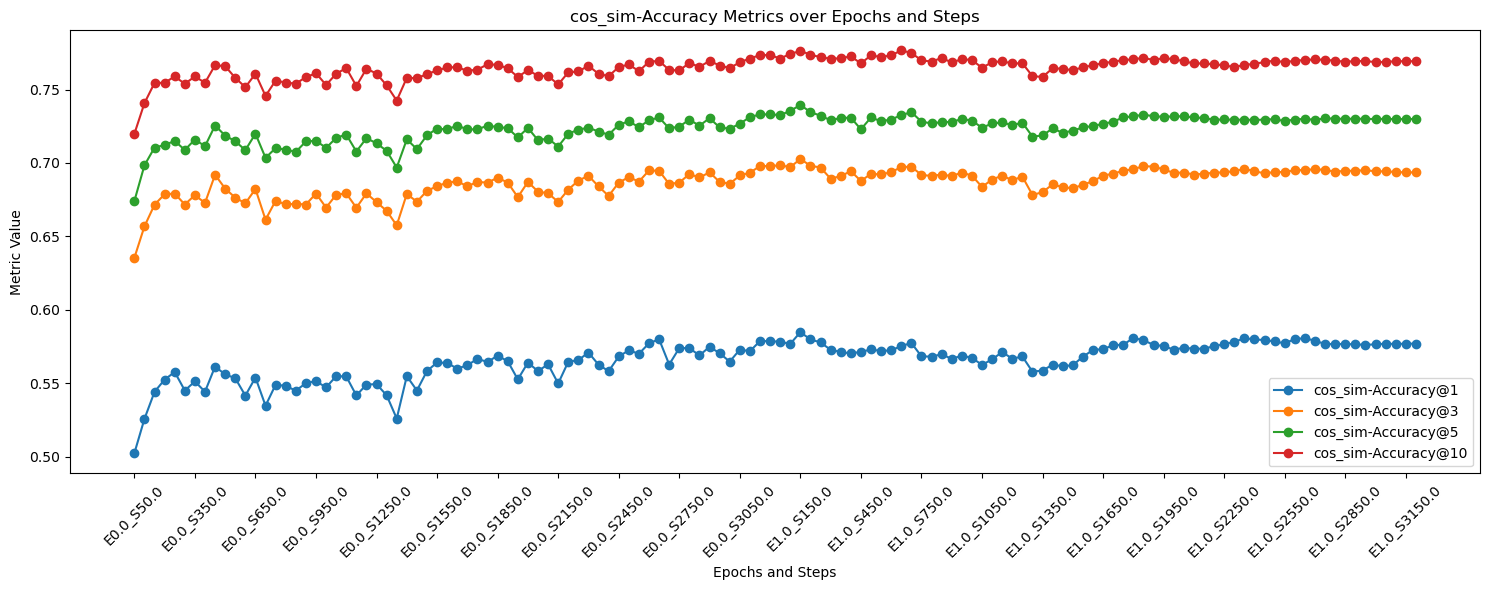

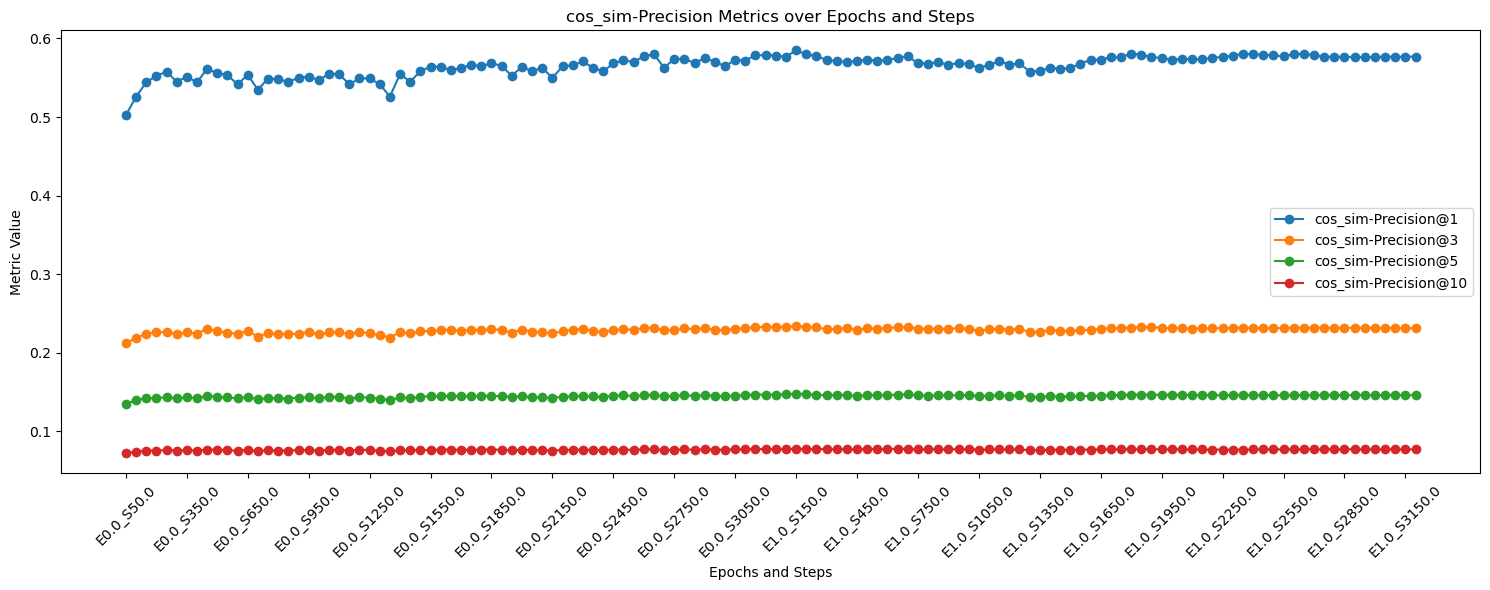

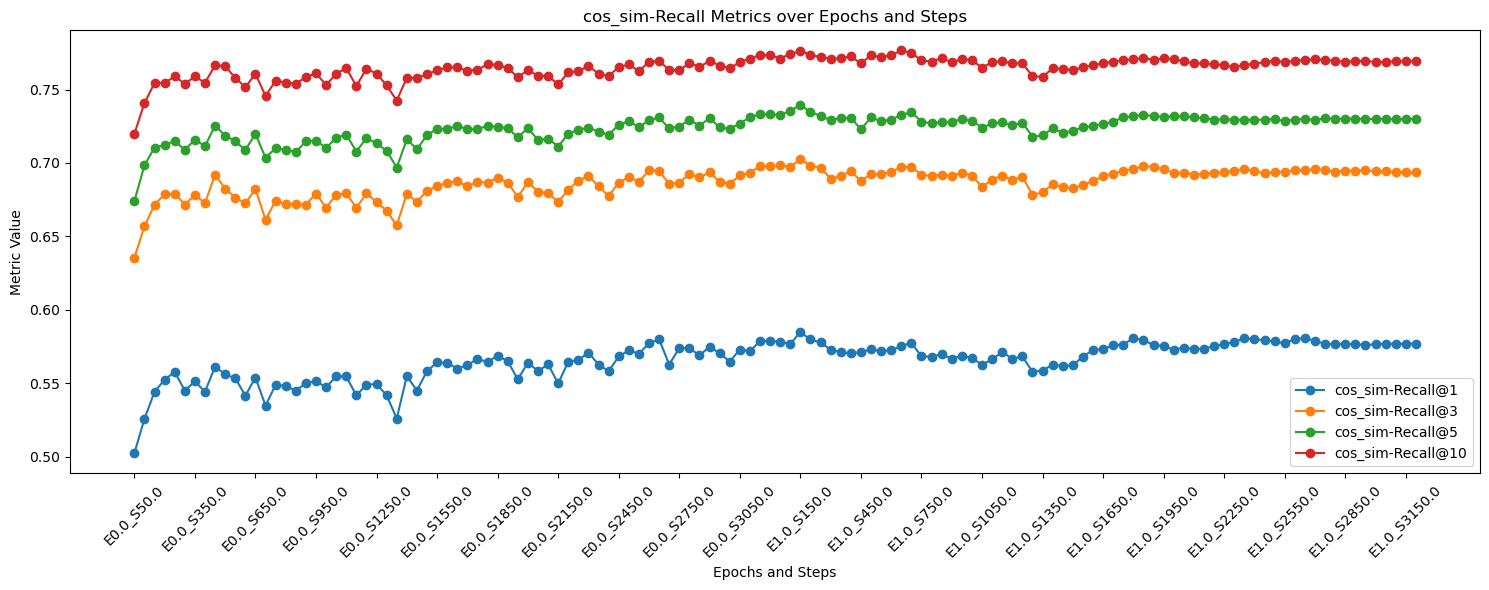

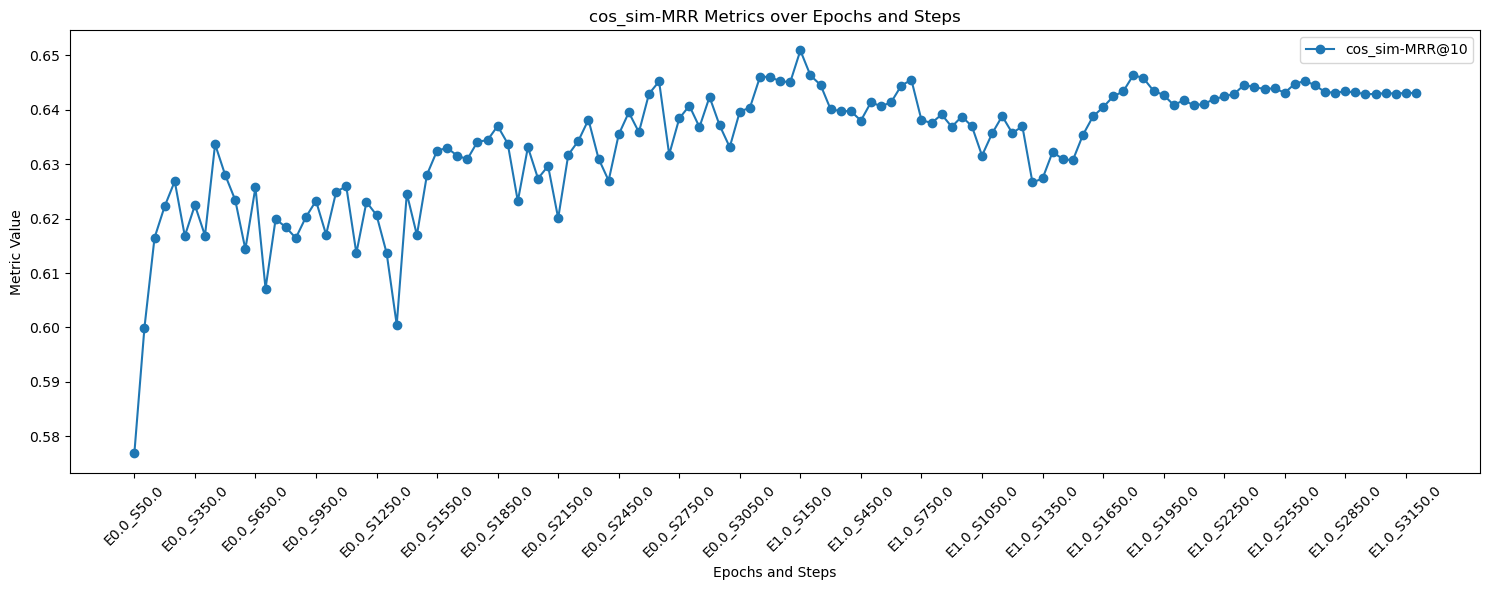

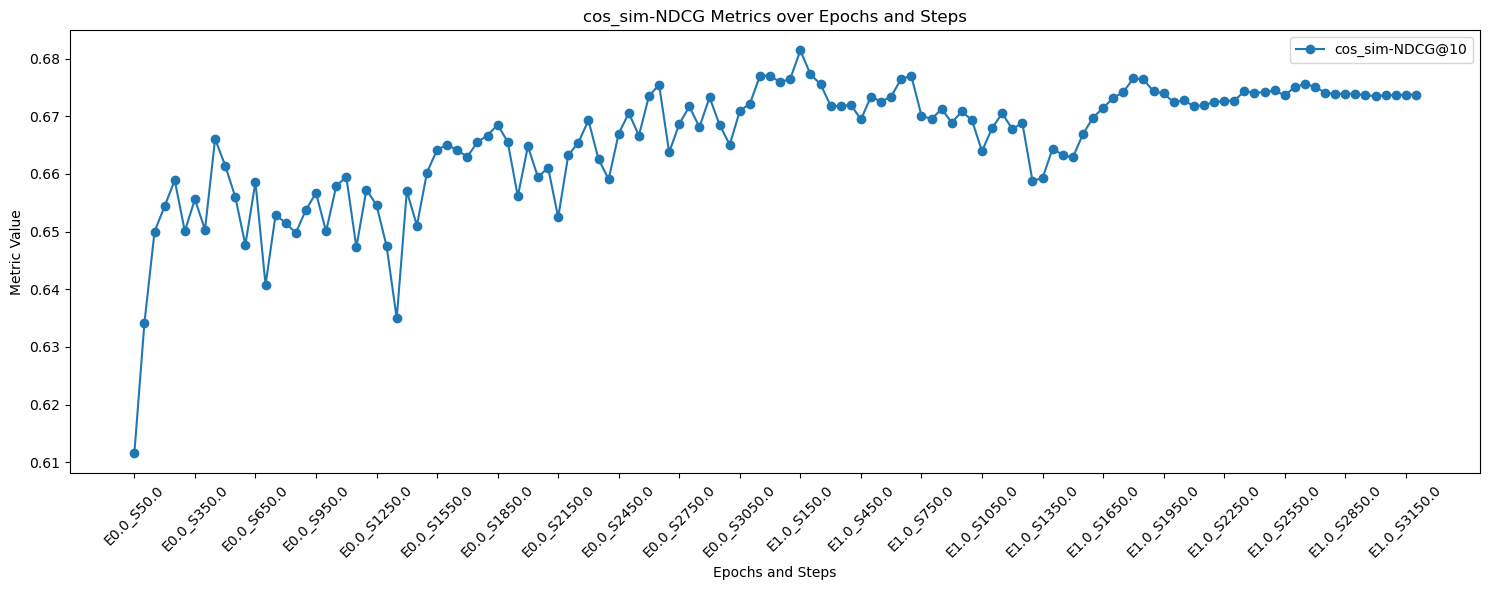

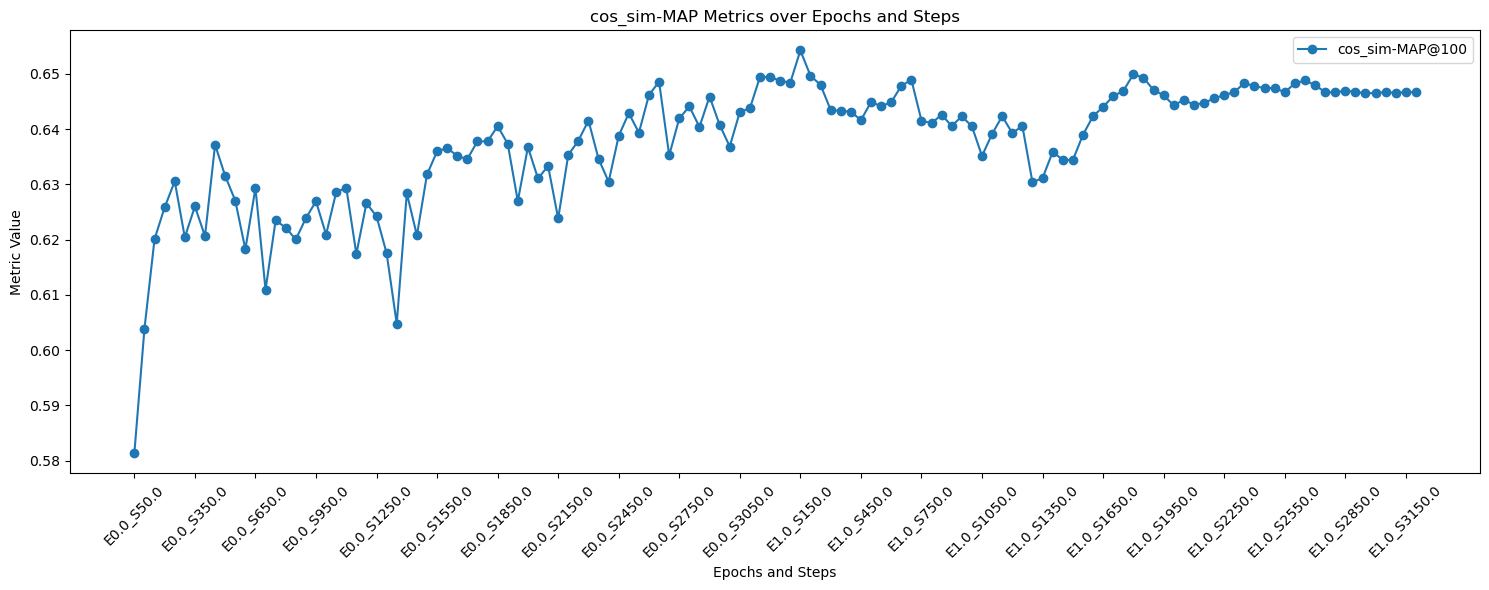

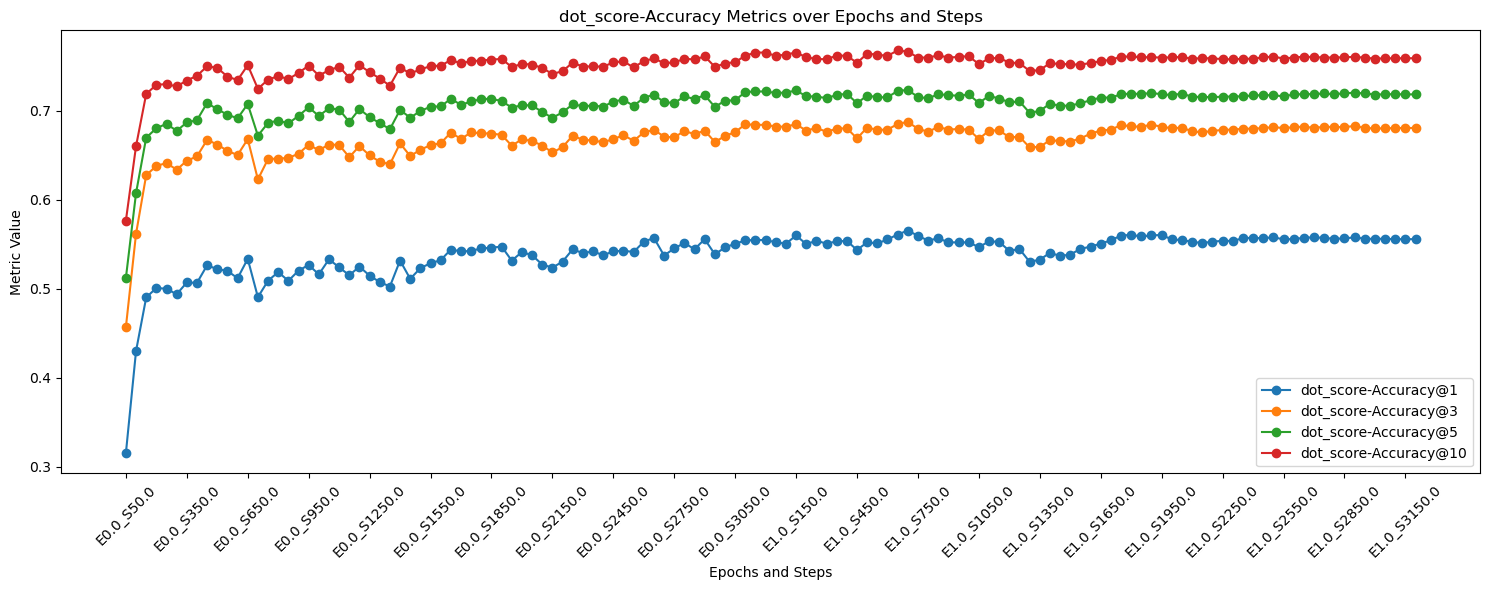

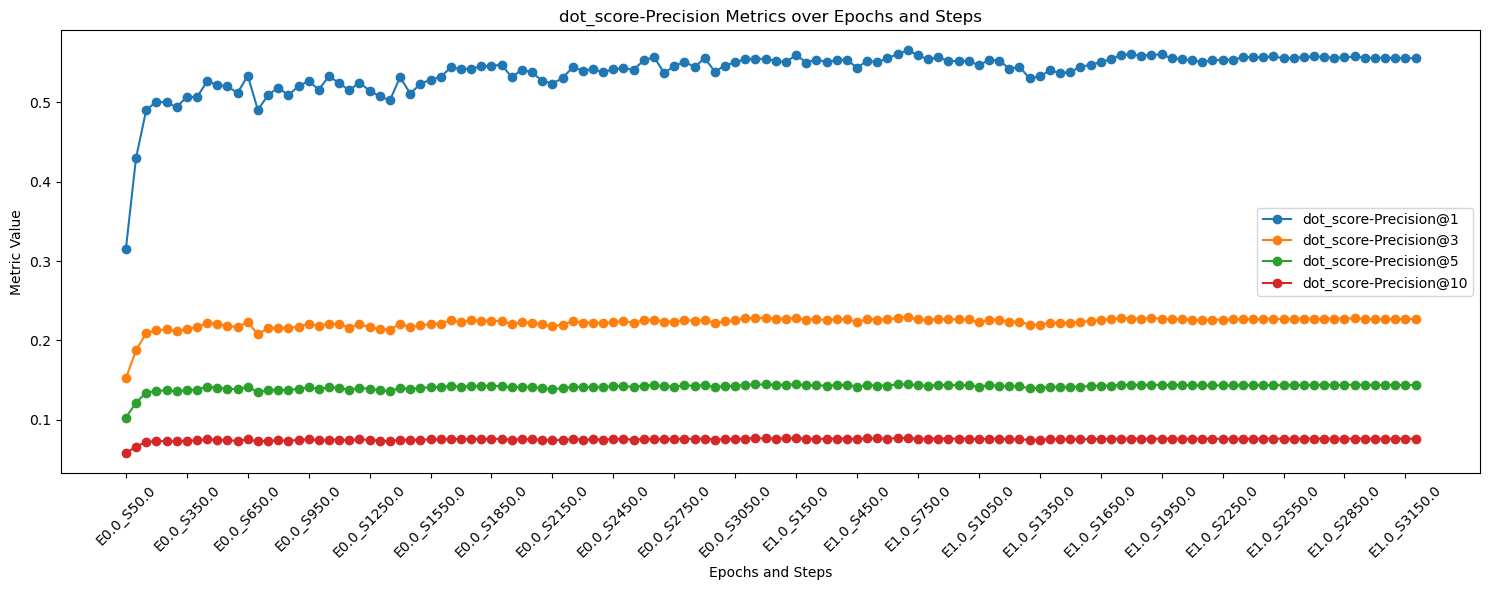

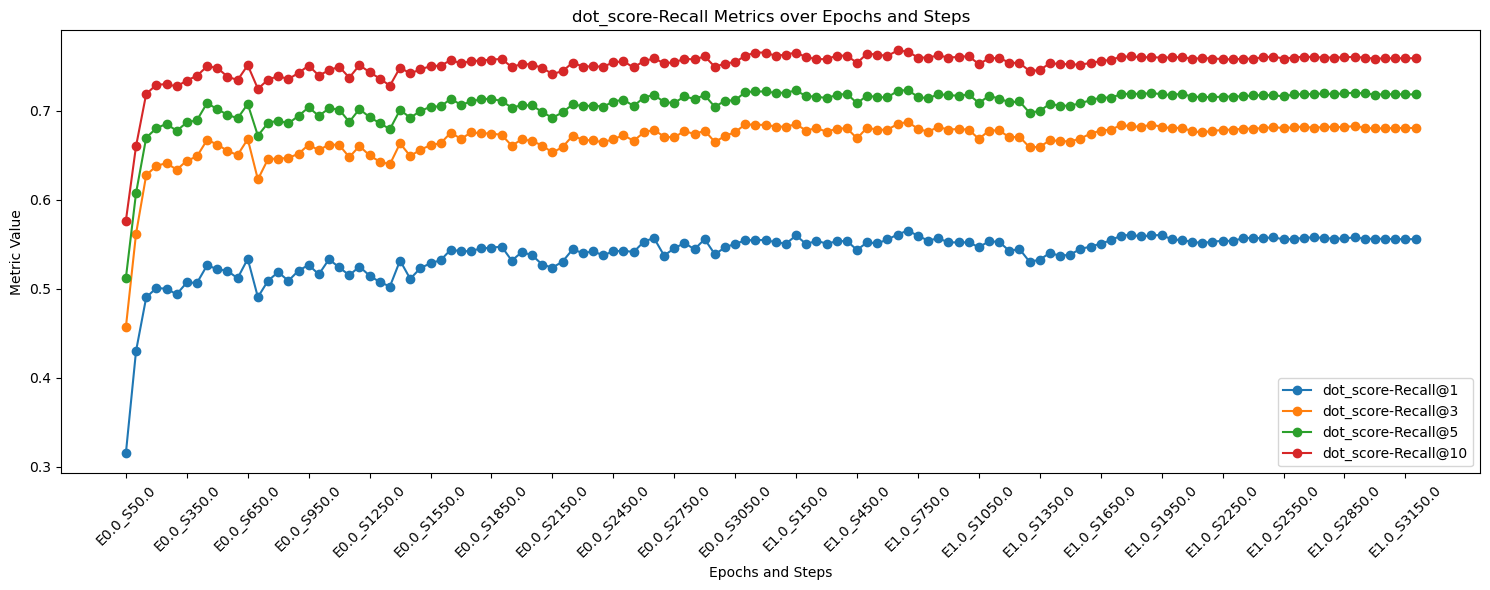

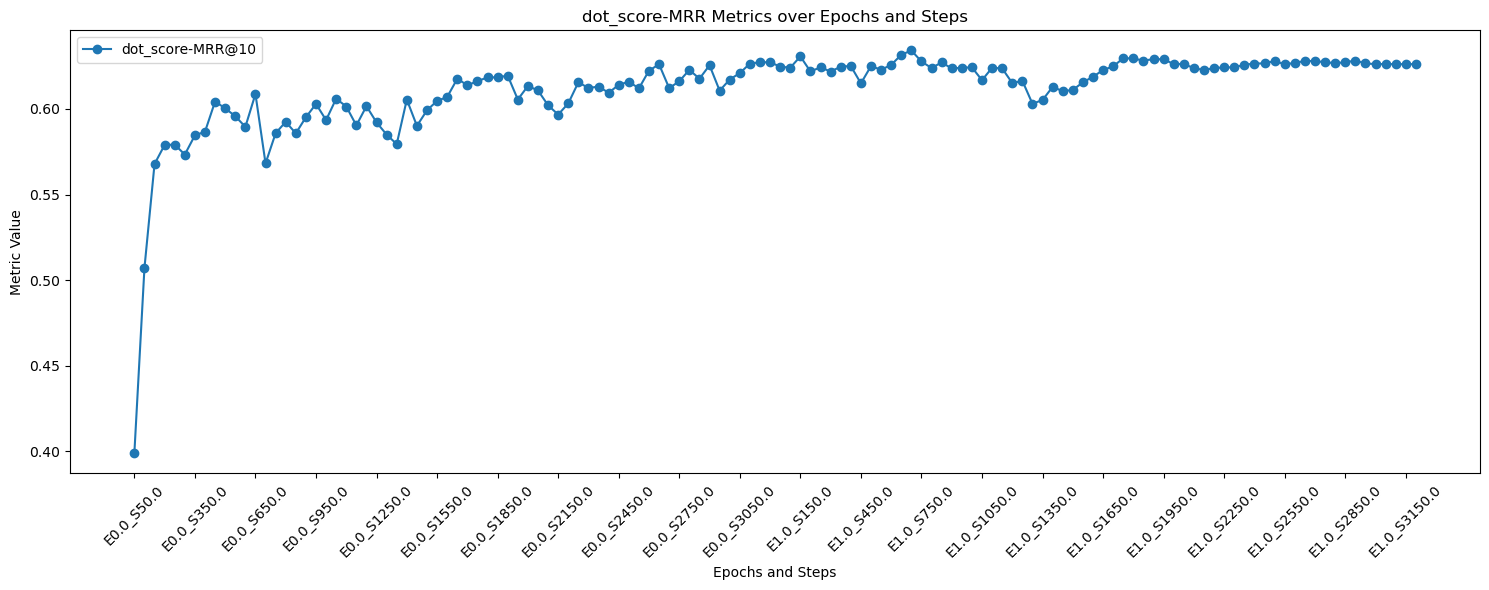

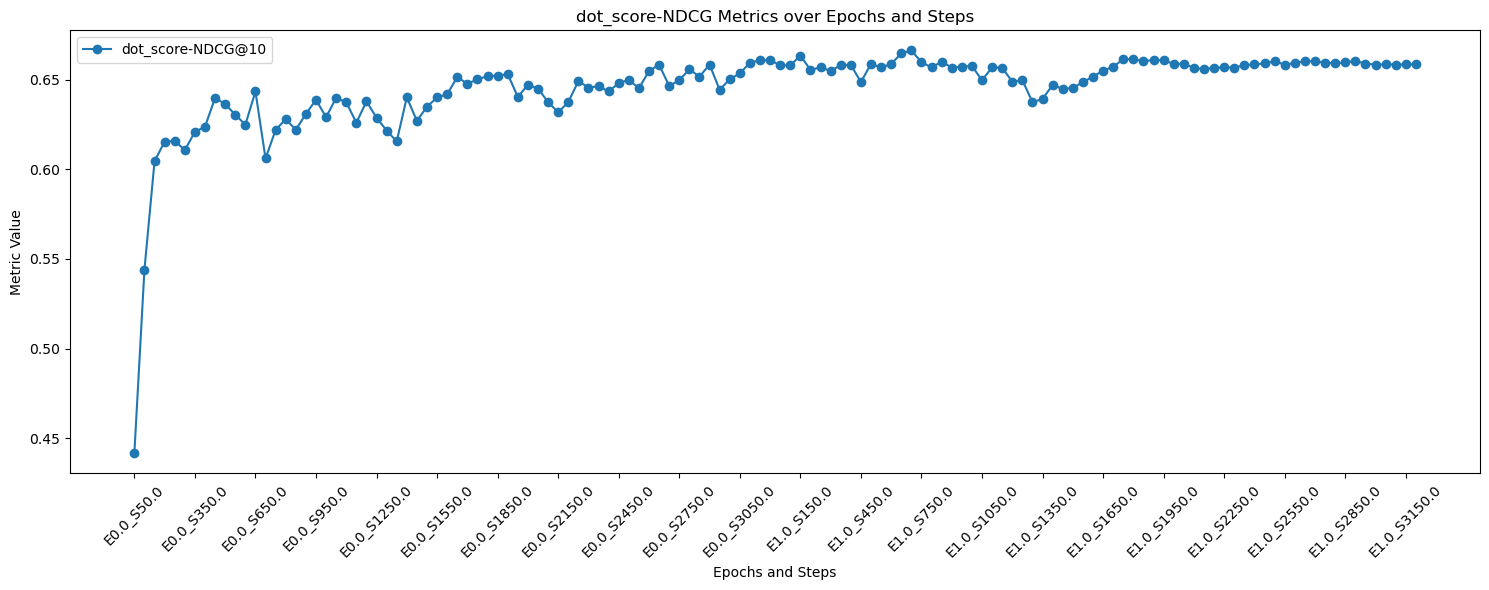

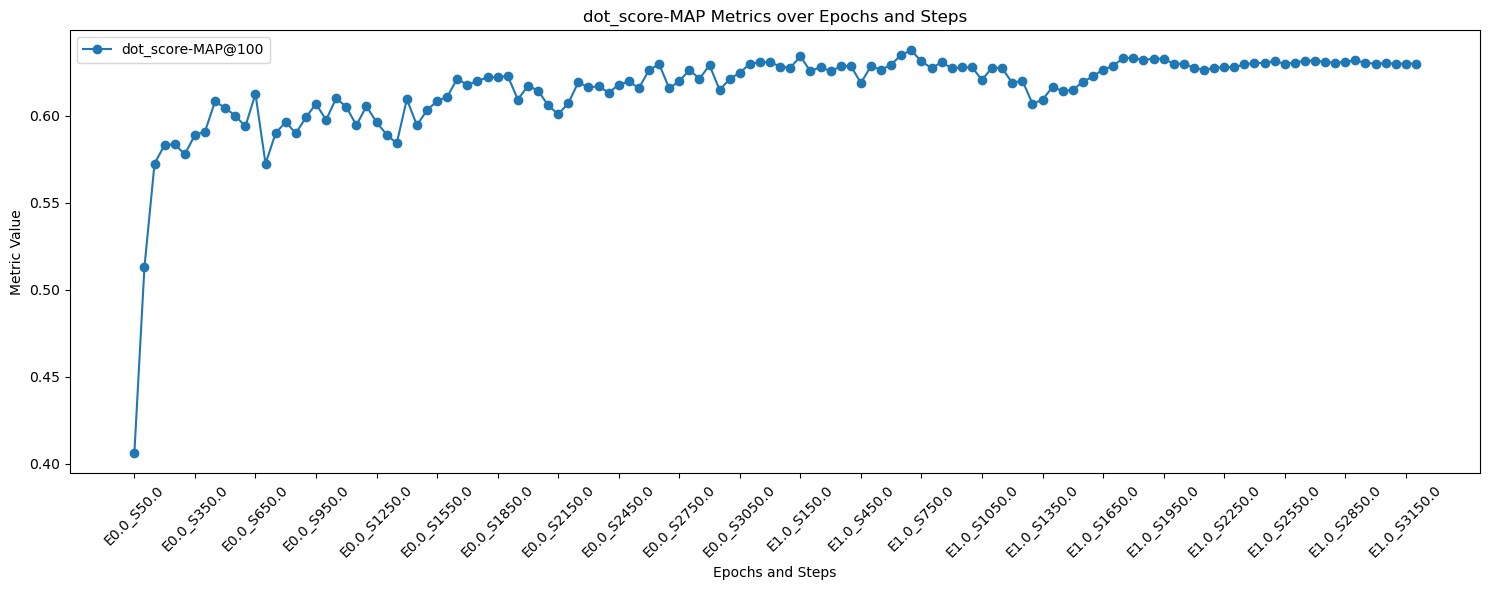

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Read the CSV file into a DataFrame
file_path = './exp_finetune_optimal/eval/Information-Retrieval_evaluation_results.csv'
df = pd.read_csv(file_path)

# Create a new column combining 'epoch' and 'steps'
df['epoch_steps'] = df.apply(lambda row: f"E{row['epoch']}_S{row['steps']}", axis=1)

# Collect metrics but exclude 'epoch', 'steps', and 'epoch_steps'
all_metrics = df.columns[2:-1]

# Group metrics based on their root name (ignoring the '@' part)
grouped_metrics = defaultdict(list)
for metric in all_metrics:
    root_metric = metric.split("@")[0]
    grouped_metrics[root_metric].append(metric)

# Generate charts for each group of metrics
for root_metric, grouped_metric_list in grouped_metrics.items():
    plt.figure(figsize=(15, 6))
    
    for metric in grouped_metric_list:
        plt.plot(df['epoch_steps'], df[metric], marker='o', label=metric)
    
    # Customize chart
    plt.xlabel('Epochs and Steps')
    plt.ylabel('Metric Value')
    plt.title(f'{root_metric} Metrics over Epochs and Steps')
    plt.legend()
    
    # Skip some x-axis labels for better visibility
    skip = len(df) // 20  # Show only around 20 labels
    plt.xticks(df.index[::skip], df['epoch_steps'].iloc[::skip], rotation=45)
    
    # Show the plot
    plt.tight_layout()
    plt.show()